## DAV 6150 Module 6 Assignment
-by Group Manling Yang, Xiaojia He, Qi Sun



***
## Introduction

The purpose of this study is to develop a model that can predict the number of wine cases ordered by distributors based on the various characteristics of the many wines represented in the data set. The wine producer is interested in understanding ways in which their own wine offerings can be adjusted to maximize wine sales.

The training dataset is comprised of information on more than 12,700 wines, with many of the attributes being related to the chemical composition of the wines. 

The test dataset is ????



**Procedures:**

Here are main procedures of this project:

Step 1: Load data into the data frame from GitHub

Step 2: Exploratory Data Analysis

* 1. Data description
* 2. Check the missing and null values
* 3. Check Duplicate Data
* 4. Check distribution and detect Outliers
* 5. Analyze relationships between variables

Step 3: Data Preparation

* 1. Handle the missing values
   * 3.1.1 'STARS' - fillna()
   * 3.1.2 Iterative Imputation for Missing Values of other variables - IterativeImputer()
* 2. Handle the negative values of numerical variable

Step 4: Step 4. Feature Engineering and Prepped Data Review

* 1. Data transformation - 'LabelAppeal'
* 2. Data transformation - 'STARS'
* 3. Data transformation - 'AcidIndex'
* 4. Correct data format of 'STARS', 'LabelAppeal', 'AcidIndex'
* 5. Encode categorical data - create dummy variables
* 6. Show relationships between categorical variables and the dependent variable
* 7. Show relationships between numberical variables and the dependent variable

Step 5: Step 5. Feature Selection

* 1. Detect multicollinearity by using Correlation Coefficients and Set Correlation thresholds
* 2. Reduce features further based on the results from correlations and VIFs

Step 6. Regression Modeling and Model Selection
* 1. Poisson Regression - Model 01
* 2. Poisson Regression - Model 02
* 3. Negative Binomial (NB) regression- Model 03
* 4. Negative Binomial (NB) regression- Model 04
* 5. Multiple Linear Regression - Model 05
* 6. Multiple Linear Regression - Model 06
* 7. Model evaluation
   * 7a. Using RMSE, $R^2$, Mean Accuracy of cross validation
   * 7b. Check Poisson Regression assumption: variance=mean
   * 7c. Compare Log-likelihood value
* 8. Model selection
   * Multiple Linear regression assumptions:
* Model Selection Summary





***



In [46]:
# Importing required libraries.

import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

import missingno as msno 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

***
### Step 1: Load data into the data frame from GitHub

`.head()` returns the first 5 rows of the dataset. 

`.tail()` returns the last 5 rows of the dataset. 


In [2]:
# read datasource from Github
data = pd.read_csv("https://raw.githubusercontent.com/susanqisun/DAV-6150/master/assignments/M3/M3_Data.csv")

# To display the top 5 rows
data.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [3]:
# To display the bottom 5 rows
data.tail()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
12790,16120,0,5.0,-0.79,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,NaN
12791,16123,5,8.9,0.47,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,-1.20,NaN,-1,8,2.0
12792,16127,4,6.0,0.17,-1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6,2.0
12793,16128,3,7.7,0.32,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0
12794,16129,4,5.2,-0.04,-0.81,52.7,NaN,-106.0,242.0,0.99454,3.94,-0.12,9.9,0,7,2.0


***
### Step 2: Exploratory Data Analysis

In this case, the steps of Exploratory Data Analysis consist of:
>1. Data Description
2. Check the missing and null values
3. Check Duplicate Data
4. Create boxplot to detect Outliers
5. Create histogram distribution
6. Analyze relationships between variables


***
#### 1. Data description:
`.shape` returns the number of rows by the number of columns for the dataset. My output was (12795, 16), meaning the dataset has 12795 rows and 16 columns.

`.info()` returns information about a DataFrame including column names, data types, non-null values and memory usage.

`.nunique(axis=0)` returns the number of unique values for each variable.

`.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables. 

`.isnull().sum()` returns the columns and the number of missing values.


In [4]:
# size of the dataset:
data.shape

(12795, 16)

In [5]:
# display column names, datatype, and non-null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
INDEX                 12795 non-null int64
TARGET                12795 non-null int64
FixedAcidity          12795 non-null float64
VolatileAcidity       12795 non-null float64
CitricAcid            12795 non-null float64
ResidualSugar         12179 non-null float64
Chlorides             12157 non-null float64
FreeSulfurDioxide     12148 non-null float64
TotalSulfurDioxide    12113 non-null float64
Density               12795 non-null float64
pH                    12400 non-null float64
Sulphates             11585 non-null float64
Alcohol               12142 non-null float64
LabelAppeal           12795 non-null int64
AcidIndex             12795 non-null int64
STARS                 9436 non-null float64
dtypes: float64(12), int64(4)
memory usage: 1.6 MB


In [6]:
# check the number of unique values per variable
data.nunique(axis=0)

INDEX                 12795
TARGET                    9
FixedAcidity            470
VolatileAcidity         815
CitricAcid              602
ResidualSugar          2077
Chlorides              1663
FreeSulfurDioxide       999
TotalSulfurDioxide     1370
Density                5933
pH                      497
Sulphates               630
Alcohol                 401
LabelAppeal               5
AcidIndex                14
STARS                     4
dtype: int64

In [7]:
# statistical summary of numeric variables:
data.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


#### Findings:

>1. The dataset consists of 16 variables and 12,795 observations.
2. Missing values: some variables contain missing values, we'll discuss how to handle the missing values later.
3. The types of data are integer and float, so we don't need to make any change to the data type.
4. For the dependent variable - TARGET, there are 9 different values, including 0. That means some kinds of wines were not sold and the number of wines with the most sold is 8.
5. Some variables have negative values, which are meaningless. 
6. For the variable of "LabelAppeal", the negative design scores and 0 scores mean people don't like the design of the label on the bottle. 


#### 2. Check the missing and null values

In [8]:
# percentage of colimns with missing values
miss = data.isnull().sum()/len(data)
# show the percentage of missing values for specific columns that contains missing values
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

pH                    0.030871
ResidualSugar         0.048144
Chlorides             0.049863
FreeSulfurDioxide     0.050567
Alcohol               0.051036
TotalSulfurDioxide    0.053302
Sulphates             0.094568
STARS                 0.262524
dtype: float64

####  Visualize the percents of nonmissing data

Text(0.5, 1.0, 'Figure 2-1. Percents of nonmissing data with missingno.')

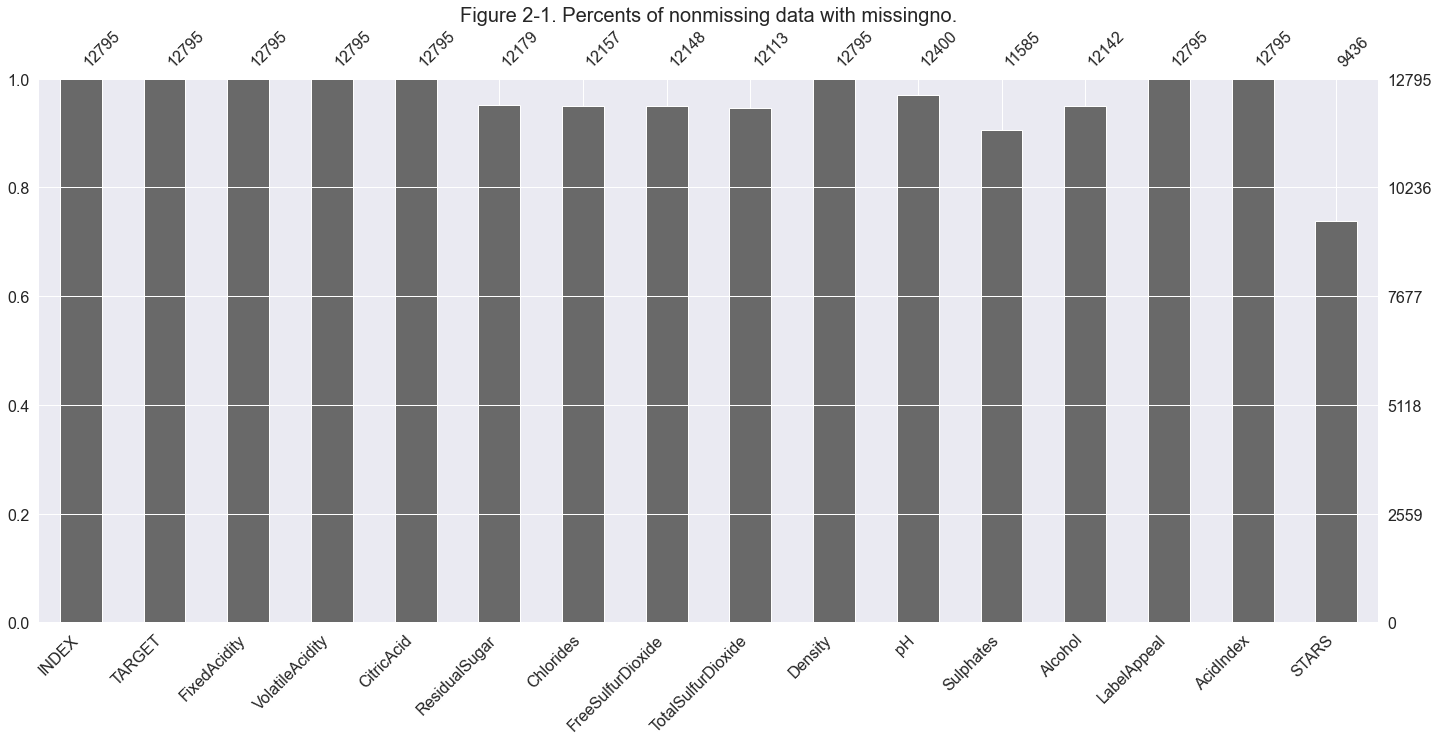

In [9]:
# create the bar charts to show percents of nonmissing databy missingo function
msno.bar(data)
plt.title('Figure 2-1. Percents of nonmissing data with missingno.',fontsize=20)

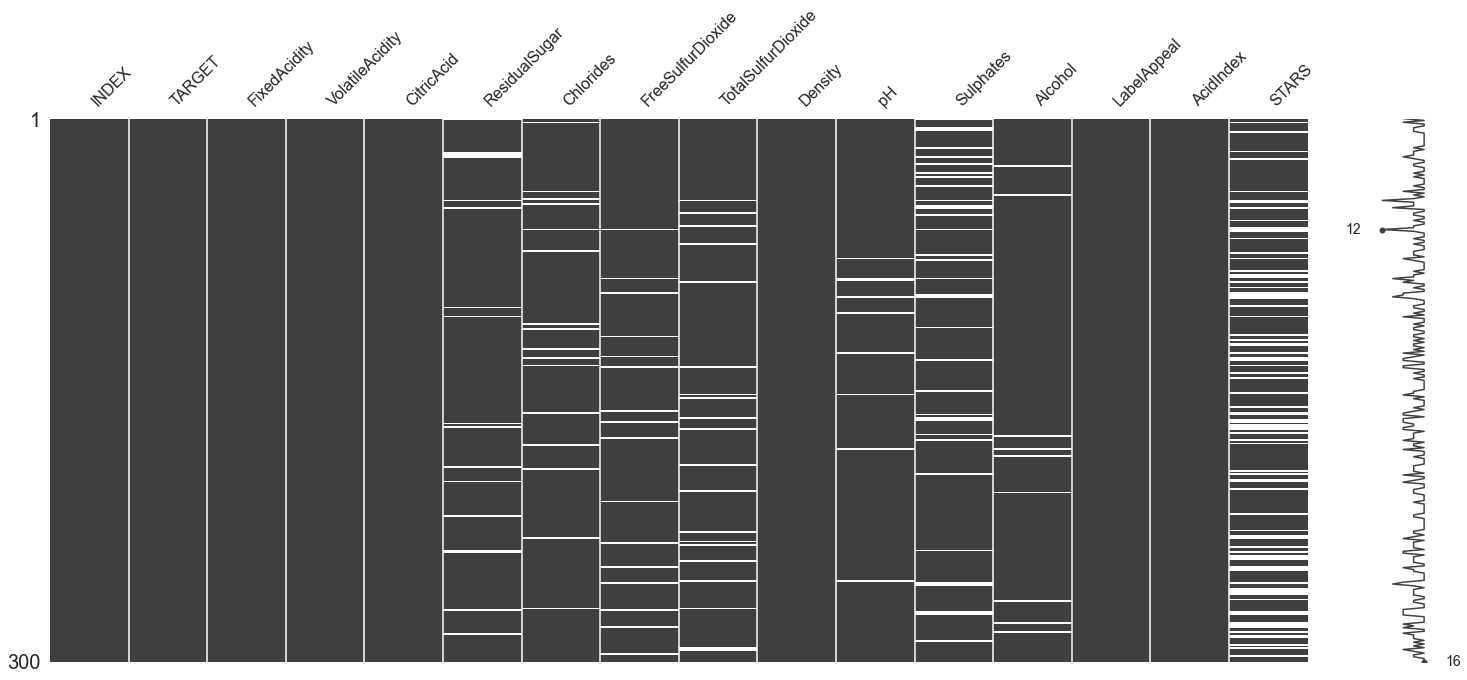

In [10]:
#visualizing patterns of the missing data by randomly selecting 300 records
ax = msno.matrix(data.sample(300))


#### Findings:

>1. The independent variables of ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, pH, Sulphates, and Alcohol have missing values.
2. The independent variables of "STARS" have missing values, which means over 25% of wines were not rated. 
3. The dependent variable "TARGET" has no missing value.
4. The missing data are random, so we'll keep the columns with missing data. 


#### 3. Check Duplicate Data

In this case, we'll check if there are any duplicate Index numbers. After checking, we found there's no duplicate Index number in the dataset.


In [11]:
# find & select rows based on a single column
duplicateDFRow = data[data.duplicated(['INDEX'])]
print(duplicateDFRow)

Empty DataFrame
Columns: [INDEX, TARGET, FixedAcidity, VolatileAcidity, CitricAcid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Density, pH, Sulphates, Alcohol, LabelAppeal, AcidIndex, STARS]
Index: []


#### 4. Check distribution and detect Outliers

First of all, we delete 'INDEX' column from the dataset since we'll not use it in the model.

Then, we'll use `sns.FacetGrid` to check the distribution of all variables.

Next, We'll use `sns.boxplot` to discover outliers. If there is an outlier it will plot as a point in boxplot but other populations will be grouped together and display as boxes. 
 


In [12]:
# dropping irrelevant column
df = data.copy()
df.drop('INDEX', axis=1, inplace=True)

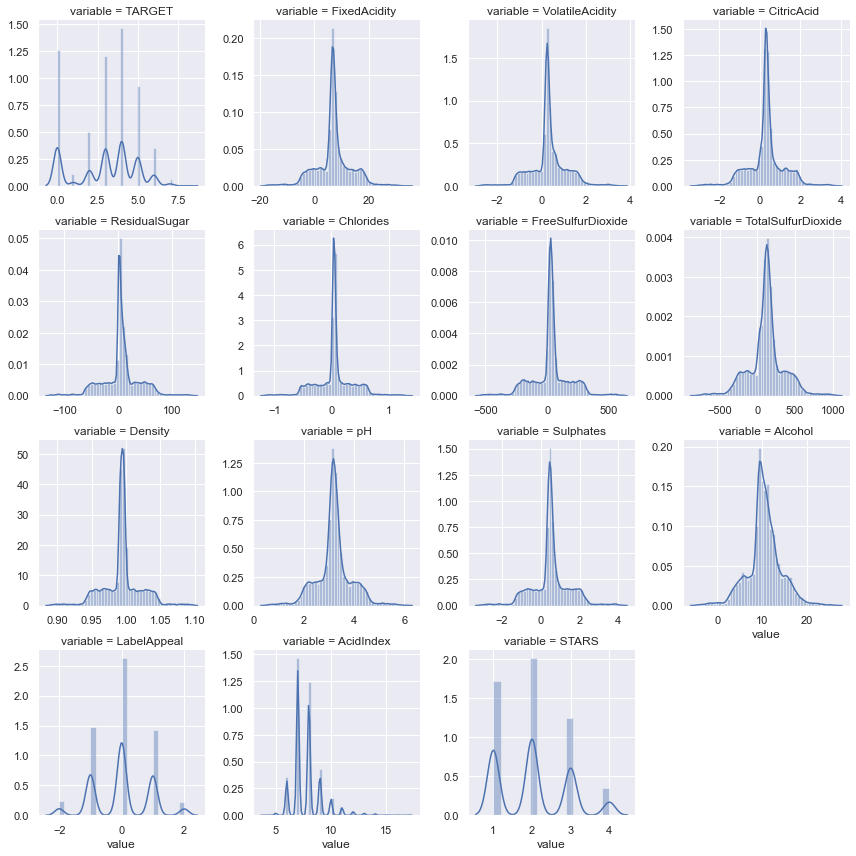

In [13]:
# use the FacetGrid to plot the histogram
nd = pd.melt(df)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

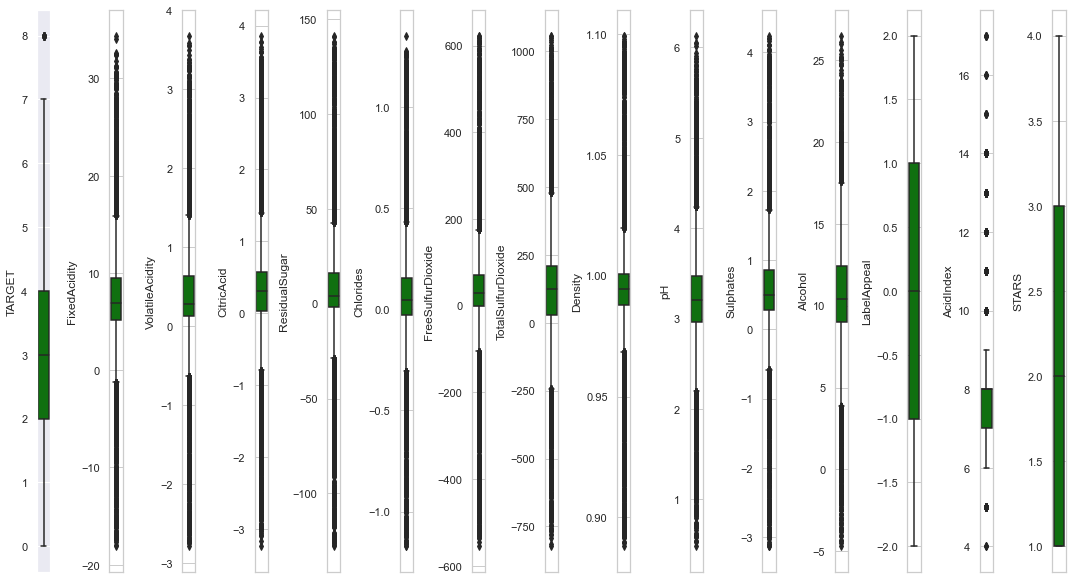

In [14]:
# detect outliers
# show the boxplots of different variables in the same graph

l = df.columns.values
number_of_columns=15

number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,8*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

#### Findings:
>1. From the histograms above, most variables are nearly normal distribution.
>2. However, many variables have negative values that seem implausible, like Alcohol.
>3.  A large number of variables have numerous outliers. However, almost all of the variables are centered around zero.
>4. From the distribution plots, we can see that the variables of LabelAppeal, AcidIndex and STARS should be ordinal variables. 
>5. The dependent variable - 'TARGET' means the number of wine cases ordered by distributors. Over 20% of wines were not sold at all, not even a single case. 4 cases sold are the most common and few wines were sold only one case or 7+ cases. These are no missing values in the dependent variables.



***
####  5. Analyze relationships between variables

Correlation is a measurement that describes the relationship between two variables.

Correlation matrix is a table that shows the Pearson correlation coefficients (Pearson's r) between many variables. We'll use `sns.heatmap()` to plot a correlation matrix of all of the variables in the dataset. Then, we'll use `.corr()` to double check the Pearson's r value.


Text(0.5, 1.0, 'Figure 5: Correlations')

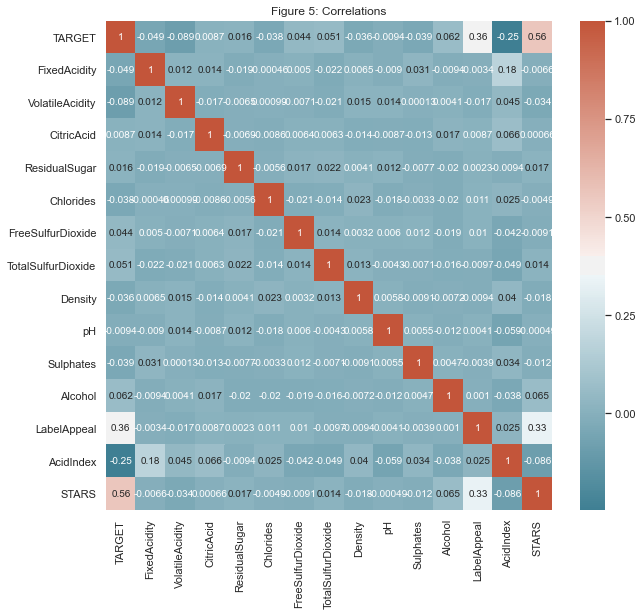

In [15]:
# Finding the correlation bewteen the Features.
plt.figure(figsize=(10,9))

corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 5: Correlations')

In [16]:
# show the number of correlation for each attributes with TARGET
corr = df.corr()
print (corr['TARGET'].sort_values(ascending=False), '\n')

TARGET                1.000000
STARS                 0.558794
LabelAppeal           0.356500
Alcohol               0.062062
TotalSulfurDioxide    0.051478
FreeSulfurDioxide     0.043824
ResidualSugar         0.016491
CitricAcid            0.008685
pH                   -0.009445
Density              -0.035518
Chlorides            -0.038263
Sulphates            -0.038850
FixedAcidity         -0.049011
VolatileAcidity      -0.088793
AcidIndex            -0.246049
Name: TARGET, dtype: float64 



#### Findings:
>1. There's no multicollinearity between any two independent variables.
2. The independent variables with the highest 3 correlation coefficient r are STARS(r=0.559), LabelAppeal(r=0.357), and AcidIndex (r=-0.246). All other r values are between +0.1 and –0.1, which have very week correlations with TARGET. However, as we said before, the variables of 'STARS', 'LabelAppeal', and 'AcidIndex'are ordinal variables. Therefore, we cannot use the correlation coefficient r of these three variables to make any decision. 

***
### Step 3. Data Preparation
### 1. Handle the missing values

#### 3.1.1 'STARS' - `fillna()`

STARS is the wine rating as determined by experts (4 = excellent; 1 = Poor). 

In this case, 26.3% of wines have missing values on STARS. Remove rows with missing 'STARS' will result in data loss. 1-star and 2-star ratings are 50% of the total, which shows that these experts are fairly critical. A wine without STARS means that the experts didn't give any rating, so it's reasonable to assume that wine without STARS means the experts give a rating 0.


Text(0.5, 0, 'New STARS with no missing')

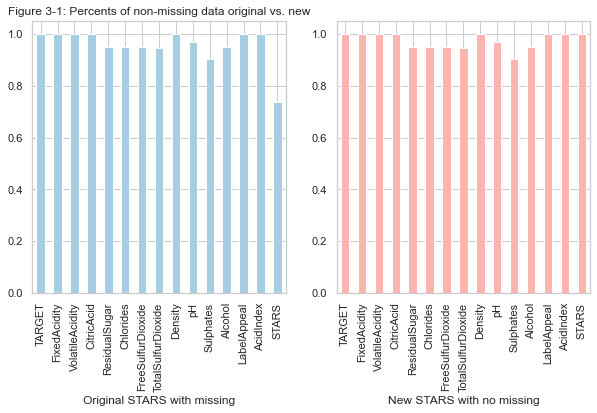

In [17]:
df02 = df.copy()

# replace null/missing values with 0
df02["STARS"].fillna(0, inplace = True) 

# Percents of nonmissing data with pandas.
plt.figure(figsize=(10,5))

plt.subplot(121)
(1 - df.isnull().mean()).abs().plot(kind='bar',colormap='Paired')
plt.xlabel('Original STARS with missing')
plt.title('Figure 3-1: Percents of non-missing data original vs. new')

plt.subplot(122)
(1 - df02.isnull().mean()).abs().plot(kind='bar',colormap='Pastel1')
plt.xlabel('New STARS with no missing')

***
#### 3.1.2 Iterative Imputation for Missing Values of other variables - `IterativeImputer()`


We also need to impute missing values from other numeric values. We'll use `IterativeImputer()`, which is a multivariate imputer that estimates each feature from all the others.
Also, the `IterativeImputer()` supports inductive mode. To use it we need to
add a special experimental import. 

Text(0.5, 0, 'New dataset with no missing')

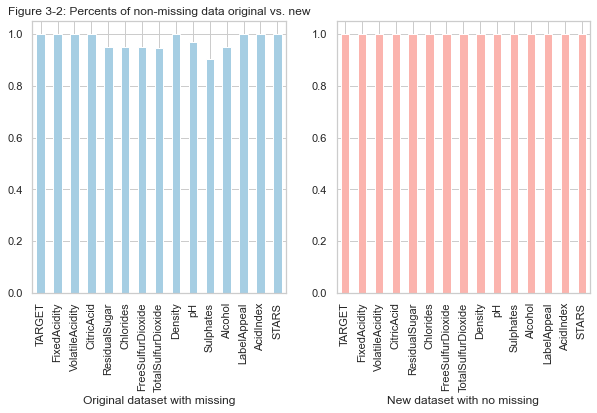

In [18]:
# import IterativeImputer and enable_iterative_imputer from sklearn library
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# impute missing values
imp = IterativeImputer()
imp.fit(df02)
df03 = imp.transform(df02)
df03 = pd.DataFrame(df03, columns=df02.columns)

# Percents of nonmissing data with pandas.
plt.figure(figsize=(10,5))

plt.subplot(121)
(1 - df02.isnull().mean()).abs().plot(kind='bar',colormap='Paired')
plt.xlabel('Original dataset with missing')
plt.title('Figure 3-2: Percents of non-missing data original vs. new')

plt.subplot(122)
(1 - df03.isnull().mean()).abs().plot(kind='bar',colormap='Pastel1')
plt.xlabel('New dataset with no missing')

#### Results:
>  As you can see from the Figure 3-1 and Figure 3-2 (comparison plots) above, all missing values have been filled or imputed.

### 2. Handle the negative values of numerical variable

There are quite a few negative values where it seems like there shouldn’t be, such as FixedAcidity, VolatileAcidity, CitricAcid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Sulphates, and Alcohol.

We guess that there might be some errors when entering the data, which result in the negative values in some variables. For example, alcohol is a percentage by volume. None of these values should be negative. The residual sugar is typically measured as either a percentage or in grams per liter. So there really should not be negative values.

We'll convert negative values to positive by using absolute values `abs()`. 

In [19]:
negative_columns = ['FixedAcidity', 'VolatileAcidity', 
                     'CitricAcid', 'ResidualSugar', 'Chlorides', 
                     'FreeSulfurDioxide', 'Sulphates','TotalSulfurDioxide', 
                     'Density', 'Alcohol']
df04 = df03.copy()

In [20]:
df04[negative_columns] = df04[negative_columns].abs()
df04[negative_columns].min()

FixedAcidity          0.00000
VolatileAcidity       0.00000
CitricAcid            0.00000
ResidualSugar         0.00000
Chlorides             0.00000
FreeSulfurDioxide     0.00000
Sulphates             0.00000
TotalSulfurDioxide    0.00000
Density               0.88809
Alcohol               0.00000
dtype: float64

#### Results:
>All negative values have been converted to positive values.


***
### Step 4. Feature Engineering and Prepped Data Review

#### 1. Data transformation - 'LabelAppeal'

**LabelAppeal** is the subjective marketing score that indicates the appeal of the design of the label on the bottle. There are five values in this variable, they are -2,-1,0,1,2. 

We'll recode -2 as 'strongly_dislike', -1 as 'dislike', 0 as 'neutral', 1 as 'like', 2 as 'strongly_like'. 


In [21]:
# replace 'LabelAppeal'
df04['LabelAppeal'] = df04['LabelAppeal'].replace(-1.0,'dislike') 
df04['LabelAppeal'] = df04['LabelAppeal'].replace(-2.0,'strongly_dislike') 

df04['LabelAppeal'] = df04['LabelAppeal'].replace(0.0,'neutral') 
df04['LabelAppeal'] = df04['LabelAppeal'].replace(1.0,'like') 
df04['LabelAppeal'] = df04['LabelAppeal'].replace(2.0,'strongly_like') 

df04['LabelAppeal'].value_counts()


neutral             5617
dislike             3136
like                3048
strongly_dislike     504
strongly_like        490
Name: LabelAppeal, dtype: int64

#### 2. Data transformation - 'STARS'

**STARS** is the wine rating as determined by experts (4 = excellent; 1 = Poor). 

We'll recode 4 as Excellent; 3 as Good; 2 as Fair; 1 as Poor; 0 as Very Poor

In [22]:
# replace 'STARS'
df04['STARS'] = df04['STARS'].replace(4.0,'Excellent') 
df04['STARS'] = df04['STARS'].replace(3.0,'Good') 

df04['STARS'] = df04['STARS'].replace(2.0,'Fair') 
df04['STARS'] = df04['STARS'].replace(1.0,'Poor') 
df04['STARS'] = df04['STARS'].replace(0.0,'Very_Poor') 

df04['STARS'].value_counts()


Fair         3570
Very_Poor    3359
Poor         3042
Good         2212
Excellent     612
Name: STARS, dtype: int64

#### 3. Data transformation - 'AcidIndex'

For **AcidIndex**, we don't how it was calculated. Since the range of AcidIndex is 4-14, we'll group AcidIndex <= 7 as low; 8<=AcidIndex<11 as medium; AcidIndex>=12 as high.


In [23]:
# count 'AcidIndex'
df04['AcidIndex'].value_counts()

7.0     4878
8.0     4142
9.0     1427
6.0     1197
10.0     551
11.0     258
12.0     128
5.0       75
13.0      69
14.0      47
15.0       8
17.0       7
16.0       5
4.0        3
Name: AcidIndex, dtype: int64

In [24]:
AcidIndex_new=[]

for i in df04['AcidIndex']:
    if i <= 7:
        AcidIndex_new.append('AI_low')
    elif i > 7 and i <= 11:
        AcidIndex_new.append('AI_medium')
    elif i > 11:
        AcidIndex_new.append('AI_high')
        
#create new column based on the results
df04['AcidIndex_new']=AcidIndex_new

df04['AcidIndex_new'].value_counts()


AI_medium    6378
AI_low       6153
AI_high       264
Name: AcidIndex_new, dtype: int64

#### 4. Correct data format of  'STARS', 'LabelAppeal',  'AcidIndex'

The variables of  'STARS', 'LabelAppeal', and 'AcidIndex' should be ordinal variables. We'll transfer these 3 variables from numerical to categorical variables here.

In [25]:
# convert data with object type to float
df04[['STARS', 'LabelAppeal','AcidIndex']] = df04[['STARS', 'LabelAppeal','AcidIndex']].astype('str')


In [26]:
df04.dtypes

TARGET                float64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal            object
AcidIndex              object
STARS                  object
AcidIndex_new          object
dtype: object

#### *Set up a dataset by dropping 'AcidIndex' column*

In [27]:
#drop column-AcidIndex
df05 = df04.drop(['AcidIndex'], axis=1)

In [28]:
#set up numerical and categorical columns
numerical_columns = ['FixedAcidity', 'VolatileAcidity', 
                     'CitricAcid', 'ResidualSugar', 'Chlorides', 
                     'FreeSulfurDioxide', 'TotalSulfurDioxide', 
                     'Density', 'Alcohol','pH','Sulphates']

categorical_columns = ['LabelAppeal', 'AcidIndex_new', 'STARS']

#### 5. Encode categorical data - create dummy variables

We'll create dummy variables for categorical data and exclude the first dummy column by calling the `pd.get_dummies()` function.


In [29]:
# create dummy variables using get_dummies, then exclude the first dummy column
df_processed = pd.get_dummies(df05, prefix_sep="_",
                              columns=categorical_columns, drop_first=True)
df_processed.head()


,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,...,LabelAppeal_like,LabelAppeal_neutral,LabelAppeal_strongly_dislike,LabelAppeal_strongly_like,AcidIndex_new_AI_low,AcidIndex_new_AI_medium,STARS_Fair,STARS_Good,STARS_Poor,STARS_Very_Poor
0,3.0,3.2,1.160,0.98,54.2,0.567000,32.152953,268.0,0.99280,3.33,...,0,1,0,0,0,1,1,0,0,0
1,3.0,4.5,0.160,0.81,26.1,0.425000,15.000000,327.0,1.02792,3.38,...,0,0,0,0,1,0,0,1,0,0
2,5.0,7.1,2.640,0.88,14.8,0.037000,214.000000,142.0,0.99518,3.12,...,0,0,0,0,0,1,0,1,0,0
3,3.0,5.7,0.385,0.04,18.8,0.425000,22.000000,115.0,0.99640,2.24,...,0,0,0,0,1,0,0,0,1,0
4,4.0,8.0,0.330,1.26,9.4,0.058149,167.000000,108.0,0.99457,3.12,...,0,1,0,0,0,1,1,0,0,0


In [30]:
df_processed.shape

(12795, 22)

In [31]:
# check columns
df_processed.columns

Index(['TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal_like',
       'LabelAppeal_neutral', 'LabelAppeal_strongly_dislike',
       'LabelAppeal_strongly_like', 'AcidIndex_new_AI_low',
       'AcidIndex_new_AI_medium', 'STARS_Fair', 'STARS_Good', 'STARS_Poor',
       'STARS_Very_Poor'],
      dtype='object')

#### 6. Show relationships between categorical variables and the dependent variable

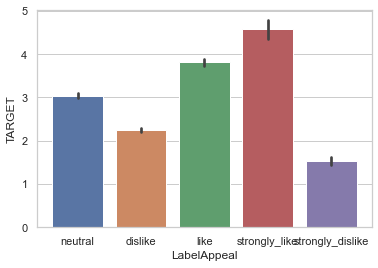

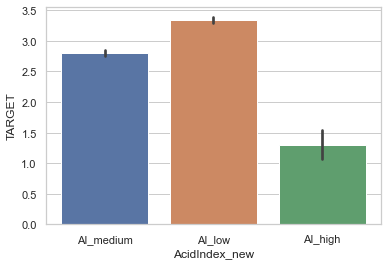

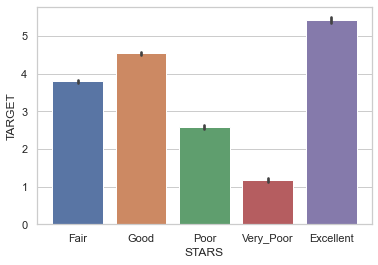

In [32]:
# create the bar chart for categorical variable
for i in categorical_columns:
    plt.figure()
    sns.barplot(x=i, y='TARGET', data=df05)
    plt.plot()


#### 7. Show relationships between numberical variables and the dependent variable

In [33]:
numerical_columns_new=['TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal_like',
       'LabelAppeal_neutral', 'LabelAppeal_strongly_dislike',
       'LabelAppeal_strongly_like', 'AcidIndex_new_AI_low',
       'AcidIndex_new_AI_medium', 'STARS_Fair', 'STARS_Good', 'STARS_Poor',
       'STARS_Very_Poor']

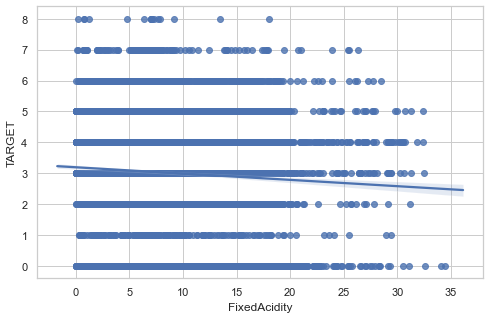

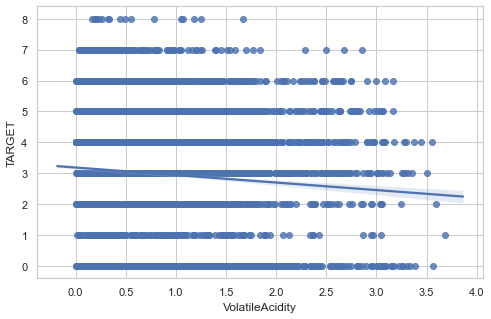

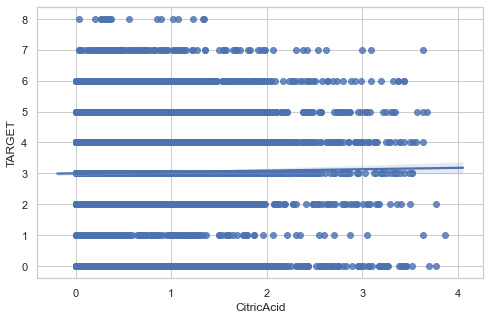

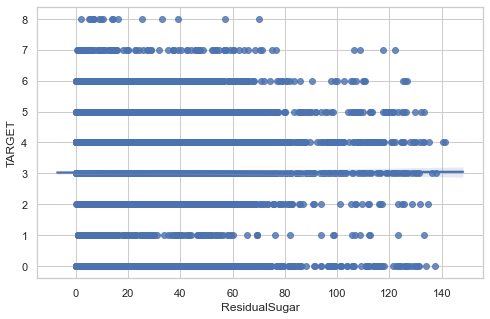

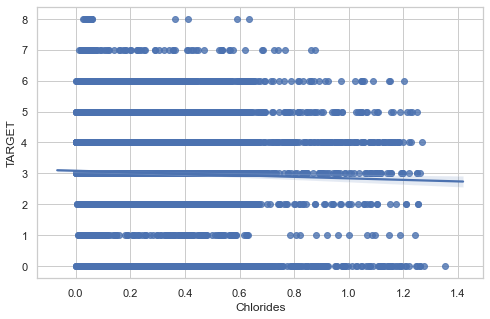

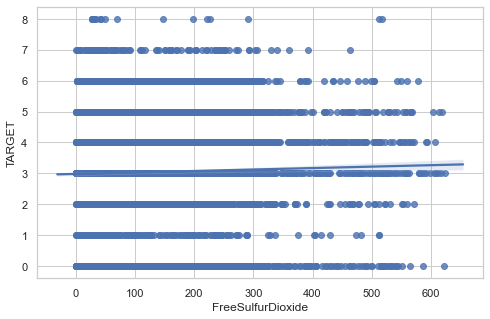

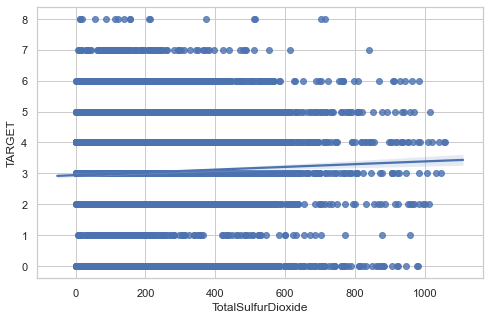

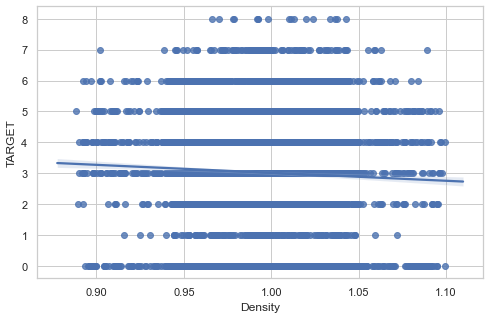

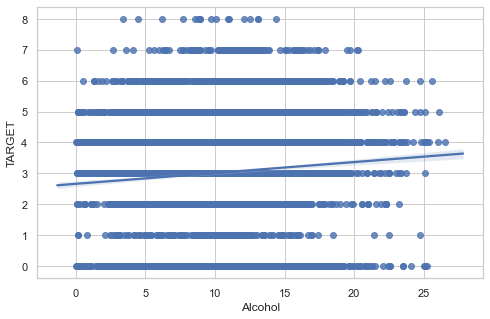

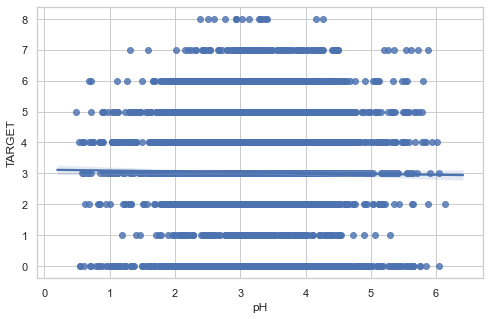

In [34]:
# show the liner regression plots of the numerical variables
for i in numerical_columns[:-1]:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=i, y='TARGET', data=df05)
    plt.plot()

Text(0.5, 1.0, 'Figure: Correlations')

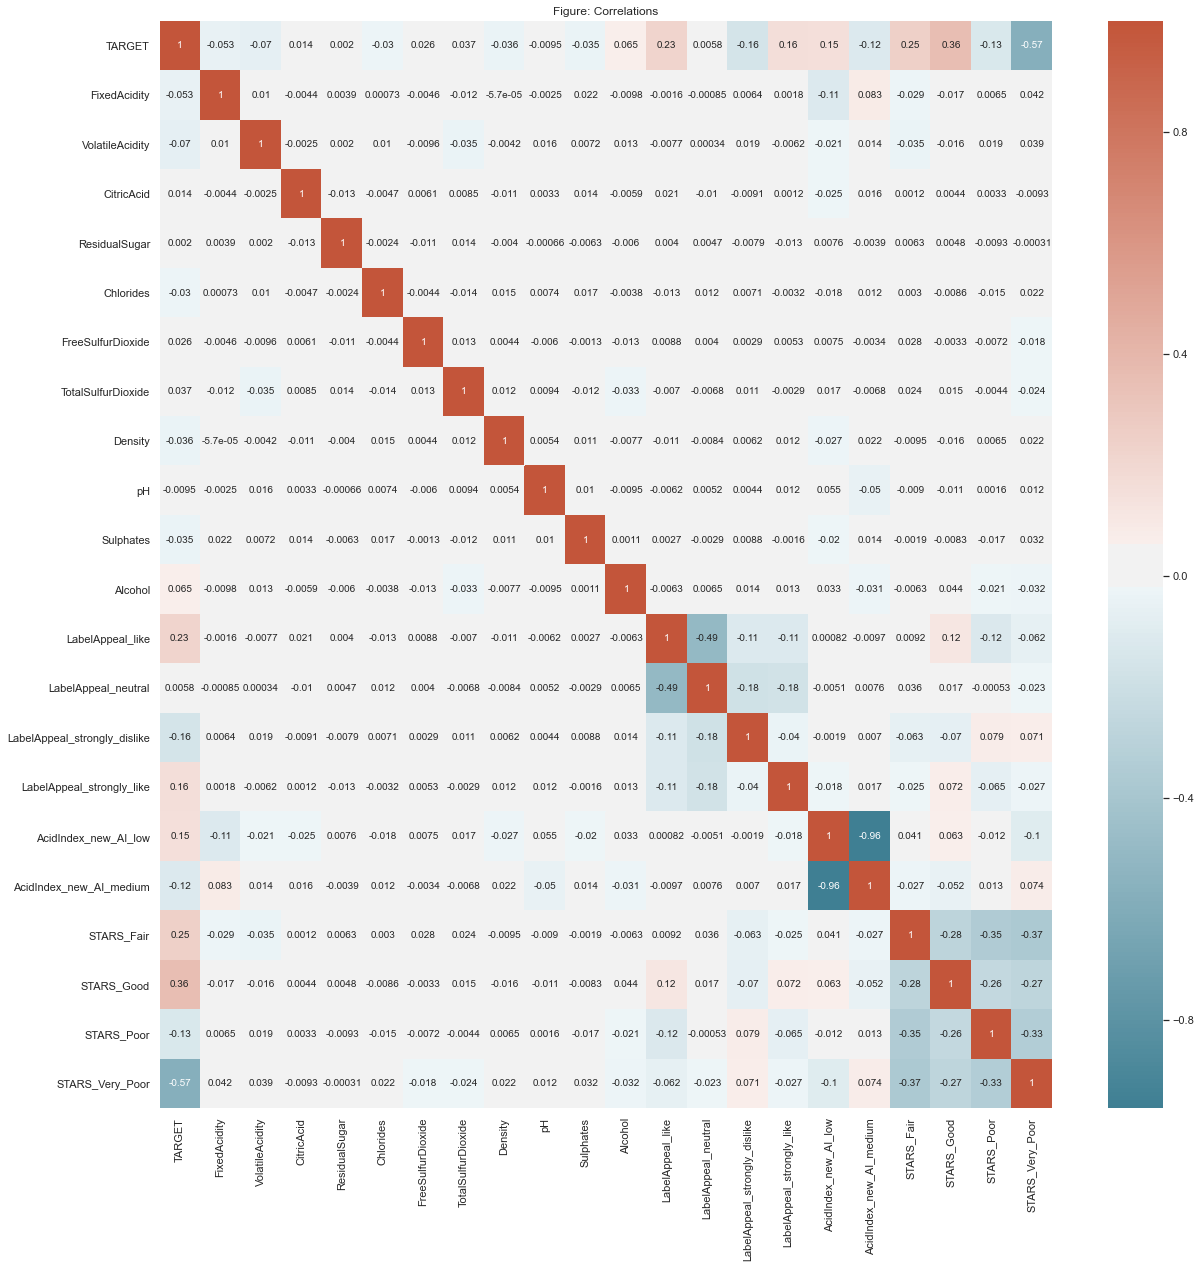

In [35]:
# Finding the correlation bewteen the Features.
plt.figure(figsize=(20,20))

corr = df_processed.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure: Correlations')

#### Findings: ????
>1. From the plots above, we found that STARS(r=0.559), LabelAppeal(r=0.357), and AcidIndex(r=-0.246) have the strongest linear relationship with TARGET. 
2. VolatileAcidity(r=-0.089), Alcohol(r=0.062), TotalSulfurDioxide(r=0.051), and FixedAcidity(r=-0.049) have weak linear relationship with TARGET. 
3. The relationships of all other features with TARGET are very weak(-0.048< r < 0.043), so we decide to ignore them.
4. We'll focus on the above 7 features and do domain knowledge research next for the regression models.
5. Positive correlations: between STARS and TARGET; between LabelAppeal and TARGET; between Alcohol and TARGET; between TotalSulfurDioxide and TARGET.
6. Negative correlations: between AcidIndex and TARGET; between VolatileAcidity and TARGET; between FixedAcidity and TARGET.


***
### Step 5. Feature Selection

#### 1. Detect multicollinearity by using Correlation Coefficients and Set Correlation thresholds

**Correlation Method**: By calculating the correlation coefficients between the variables we can get to know about the extent of multicollinearity in the data.

In this case, an absolute correlation coefficient of >0.8 among two predictors indicates the presence of multicollinearity. 

Checking for multicollinearity is a very important step during the feature selection process. Multicollinearity can significantly reduce the model’s performance. Removing multicollinear features will both reduce the number of features and improve the model’s performance.


In [36]:
#make a copy of dataset
df_final = df_processed.copy()

In [37]:
# include all features
X01 = df_final.drop(['TARGET'], axis=1)
y = df_final[['TARGET']]


In [38]:
# calculate correlation coefficients
corr_result=X01.corr() 
corr_result = corr_result.stack()
corr_result[(corr_result != 1.0)&((corr_result > 0.7)|(corr_result < -0.7))]


AcidIndex_new_AI_low     AcidIndex_new_AI_medium   -0.959556
AcidIndex_new_AI_medium  AcidIndex_new_AI_low      -0.959556
dtype: float64

#### Findings:

>1. When two independent variables have a r value greater than 0.8, the multicollinearity is present in the data. 
>2. We need to delete one from the pair correlation with a r value higher than 0.7. However, we don't know which one should be deleted.
>3. We'll use these r values later to decide which variable should be removed. 

#### 2. Reduce features further based on the results from correlations and VIFs

**VIF (Variance Inflation Factor) Method**: Firstly we fit a model with all the variables and then calculate the variance inflation factor (VIF) for each variable. VIF measures how much the variance of an estimated regression coefficient increases if our predictors are correlated. The higher the value of VIF for ith regressor, the more it is highly correlated to other variables.

We use the statsmodels `variance_inflation_factor` to calculate VIF. There are some guidelines we can use to determine whether our VIFs are in an acceptable range. A rule of thumb commonly used in practice is if a **VIF is > 10**, you have high multicollinearity. Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features.

**01. Full features model**

In [39]:
# check all 21 features

# add constant
X01_new = sm.add_constant(X01)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X01_new.values, i) for i in range(X01_new.shape[1])]
vif["features"] = X01_new.columns
vif.round(1)


C:\Users\13750\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,VIF Factor,features
0,1536.8,const
1,1.0,FixedAcidity
2,1.0,VolatileAcidity
3,1.0,CitricAcid
4,1.0,ResidualSugar
5,1.0,Chlorides
6,1.0,FreeSulfurDioxide
7,1.0,TotalSulfurDioxide
8,1.0,Density
9,1.0,pH


#### Findings:
>1. The VIF of AcidIndex_new_AI_low is 13.1, which is the highest vif value. The VIF of AcidIndex_new_AI_medium is 12.9.
>2. Also, the correlation r value between AcidIndex_new_AI_low and AcidIndex_new_AI_medium is -0.96.
>3. For the next step, we'll drop the AcidIndex_new_AI_low column from the train dataset.

**02. Drop 'AcidIndex_new_AI_low' and check VIF of the remaining 20 features**

In [40]:
# delete AcidIndex_new_AI_low
X02 = X01.drop(['AcidIndex_new_AI_low'], axis=1)

# add constant
X = sm.add_constant(X02)

# For each X, calculate VIF and save in dataframe
vif02 = pd.DataFrame()
vif02["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif02["features"] = X.columns
vif02.round(1)


,VIF Factor,features
0,1473.2,const
1,1.0,FixedAcidity
2,1.0,VolatileAcidity
3,1.0,CitricAcid
4,1.0,ResidualSugar
5,1.0,Chlorides
6,1.0,FreeSulfurDioxide
7,1.0,TotalSulfurDioxide
8,1.0,Density
9,1.0,pH


#### Findings:
>1. All VIF values are smaller than 10.
>2. Only one feature is removed and the total number of features is 20, they are 'FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar','Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'pH', 'Sulphates', 'Alcohol','LabelAppeal_like', 'LabelAppeal_neutral','LabelAppeal_strongly_dislike','LabelAppeal_strongly_like','AcidIndex_new_AI_medium', 'STARS_Fair', 'STARS_Good', 'STARS_Poor',and 'STARS_Very_Poor'.
>3. The next step is to fit the models using these 20 features and check the performance.

***
### Step 6. Regression Modeling and Model Selection
#### 1. Split the data into training and testing subsets
#### 2. Poisson Regression - Model 01

Poisson regression is used to predict a dependent variable that consists of "count data" given one or more independent variables. It is only appropriate to use Poisson regression if the data "passes" five assumptions that are required for Poisson regression to give a valid result.

Assumption #1: Dependent variable consists of count data.

Assumption #2: One or more independent variables, which can be measured on a continuous, ordinal or nominal/dichotomous scale.

Assumption #3: Independence of observations. 

Assumption #4: The distribution of counts (conditional on the model) follow a Poisson distribution.

Assumption #5: The mean and variance of the model are identical. 

We'll use the `statsmodels GLM` class, train the Poisson regression model on the training data set.


#### 1. Split the data into training and testing subsets

In [69]:
# Now split the data into training and testing subsets. 
# We'll set aside 30% of the data for testing purposes; Remember to make sure you specify a value for the inital random_state
# if you want to have the ability to reproduce the exact same training + testing subsets repeatedly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
# check the results
print('length of X_train is',len(X_train))
print('length of y_train is',len(y_train))
print('length of X_test is',len(X_test))
print('length of y_test is',len(y_test))

length of X_train is 8956
length of y_train is 8956
length of X_test is 3839
length of y_test is 3839


In [70]:
# check the row indices of the new objects to see whether they match
y_test.head()

,TARGET
6415,3.0
7792,3.0
8743,2.0
2340,3.0
4101,4.0


In [71]:
# check the row indices of the new objects to see whether they match
X_test.head()

,const,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,...,Alcohol,LabelAppeal_like,LabelAppeal_neutral,LabelAppeal_strongly_dislike,LabelAppeal_strongly_like,AcidIndex_new_AI_medium,STARS_Fair,STARS_Good,STARS_Poor,STARS_Very_Poor
6415,1.0,17.1,0.59,0.42,45.100000,0.086,13.0,208.0,0.99546,5.710000,...,11.500000,0,0,0,0,1,1,0,0,0
7792,1.0,7.1,1.77,1.08,6.213733,0.041,218.0,192.0,0.97715,3.198013,...,16.200000,0,0,0,0,1,1,0,0,0
8743,1.0,6.9,0.20,3.36,41.300000,0.032,51.0,37.0,0.99390,3.220000,...,10.652202,0,0,0,0,1,0,0,0,1
2340,1.0,17.0,0.14,0.28,44.400000,0.041,15.0,235.0,0.99540,3.450000,...,5.300000,0,0,0,0,1,0,0,1,0
4101,1.0,2.6,0.07,0.35,2.300000,0.535,88.0,128.0,0.99056,2.940000,...,17.500000,0,1,0,0,0,1,0,0,0


In [72]:
# check the row indices of the new objects to see whether they match
X_train.head()

,const,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,...,Alcohol,LabelAppeal_like,LabelAppeal_neutral,LabelAppeal_strongly_dislike,LabelAppeal_strongly_like,AcidIndex_new_AI_medium,STARS_Fair,STARS_Good,STARS_Poor,STARS_Very_Poor
7666,1.0,8.0,0.010,0.30,53.8,0.547,183.0,141.0,1.00501,2.53,...,10.2,0,0,0,0,1,0,0,0,1
8033,1.0,4.1,1.590,2.18,29.3,0.041,91.0,117.0,1.01736,3.33,...,13.1,0,0,0,1,1,1,0,0,0
4384,1.0,0.5,0.570,0.14,65.4,0.178,297.0,324.0,1.04692,3.32,...,9.2,0,1,0,0,0,0,0,0,1
7064,1.0,13.4,0.185,0.19,50.2,0.171,179.0,169.0,0.99438,3.26,...,9.5,0,1,0,0,0,0,0,1,0
11150,1.0,5.4,0.000,1.82,67.0,0.079,58.0,258.0,0.99770,3.08,...,15.4,1,0,0,0,1,0,1,0,0


In [73]:
# check the row indices of the new objects to see whether they match
y_train.head()

,TARGET
7666,0.0
8033,5.0
4384,0.0
7064,4.0
11150,4.0


#### 2. Poisson Regression - Model 01

In [74]:
# fit poisson regression model01
model_poisson01 = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# predict on the dataset
y_pred_poisson01 = model_poisson01.predict(X_train)

# evaluating the model on the dataset
rmse_poisson01 = np.sqrt(metrics.mean_squared_error(y_train, y_pred_poisson01))
r2_poisson01 = metrics.r2_score(y_train, y_pred_poisson01)
  

In [75]:
#Print the training summary.
print(model_poisson01.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 8956
Model:                            GLM   Df Residuals:                     8935
Model Family:                 Poisson   Df Model:                           20
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16053.
Date:                Sun, 28 Jun 2020   Deviance:                       9757.9
Time:                        14:09:19   Pearson chi2:                 8.09e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### 3. Poisson Regression - Model 02

Remove the variables of 'CitricAcid', 'ResidualSugar', 'FreeSulfurDioxide', and 'pH' that are not statistically significant to the model (p>.05).

In [97]:
# remove unmeaningful columns
X02 = X_train.drop(['CitricAcid','ResidualSugar','FreeSulfurDioxide','pH'], axis=1)                          

In [79]:
# fit poisson regression model02
model_poisson02 = sm.GLM(y_train, X02, family=sm.families.Poisson()).fit()

# predict on the dataset
y_pred_poisson02 = model_poisson02.predict(X02)

# evaluating the model on the dataset
rmse_poisson02 = np.sqrt(metrics.mean_squared_error(y_train, y_pred_poisson02))
r2_poisson02 = metrics.r2_score(y_train, y_pred_poisson02)
  

In [80]:
#Print the training summary.
print(model_poisson02.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 8956
Model:                            GLM   Df Residuals:                     8939
Model Family:                 Poisson   Df Model:                           16
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16055.
Date:                Sun, 28 Jun 2020   Deviance:                       9761.0
Time:                        14:11:33   Pearson chi2:                 8.09e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### 4.  Negative Binomial (NB) regression- Model 03

Negative binomial regression is for modeling count variables, usually for over-dispersed count outcome variables.

Negative binomial regression shares many common assumptions with Poisson regression, such as linearity in model parameters, independence of individual observations, and the multiplicative effects of independent variables. However, comparing with Poisson regression, negative binomial regression allows the conditional variance of the outcome variable to be greater than its conditional mean, which offers greater flexibility in model fitting. 



In [81]:
# fit Negative Binomial regression
model_nb03 = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=0.15)).fit()

# predict on the dataset
y_pred_nb03 = model_nb03.predict(X_train)

# evaluating the model on the dataset
rmse_nb03 = np.sqrt(metrics.mean_squared_error(y_train, y_pred_nb03))
r2_nb03 = metrics.r2_score(y_train, y_pred_nb03)



In [82]:
print(model_nb03.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 8956
Model:                            GLM   Df Residuals:                     8935
Model Family:        NegativeBinomial   Df Model:                           20
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16812.
Date:                Sun, 28 Jun 2020   Deviance:                       8051.0
Time:                        14:12:05   Pearson chi2:                 6.38e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### 5.  Negative Binomial (NB) regression- Model 04

Remove the variables of 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'Density','pH','Sulphates'that are not statistically significant to the model (p>.05).


In [98]:
# remove unmeaningful columns
X03 = X_train.drop(['CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide','Density','pH','Sulphates'], axis=1)
                          

In [84]:
# fit Negative Binomial regression
model_nb04 = sm.GLM(y_train, X03,family=sm.families.NegativeBinomial(alpha=0.15)).fit()

# predict on the dataset
y_pred_nb04 = model_nb04.predict(X03)

# evaluating the model on the dataset
rmse_nb04 = np.sqrt(metrics.mean_squared_error(y_train, y_pred_nb04))
r2_nb04 = metrics.r2_score(y_train, y_pred_nb04)

In [85]:
print(model_nb04.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 8956
Model:                            GLM   Df Residuals:                     8942
Model Family:        NegativeBinomial   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16817.
Date:                Sun, 28 Jun 2020   Deviance:                       8062.3
Time:                        14:12:37   Pearson chi2:                 6.39e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### 6. Multiple Linear  Regression - Model 05

https://pythonfordatascienceorg.wordpress.com/linear-regression-python/

* Assumption of Multicollinearity

* Assumption of Independent Errors

* Assumption of Normality of the Residuals

* Assumption of Homoscedasticity


In [86]:
# Instantiate model
model01 = LinearRegression()

# fit the model using 10-fold cross validation
scores01 = cross_val_score(model01, X_train, y_train, cv=10)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores01)

# calculate the average accuracy across all 10 folds
print('Mean Accuracy:', np.mean(scores01))

[0.52538649 0.52245583 0.4799107  0.49200175 0.54171063 0.48983371
 0.54656615 0.5476227  0.54607143 0.51887775]
Mean Accuracy: 0.521043715586128


In [87]:
# fit model
model_linear01 = sm.OLS(y_train, X_train).fit()

# predict on the dataset
y_pred_linear05 = model_linear01.predict(X_train)

# evaluating the model on the dataset
rmse_linear05 = np.sqrt(metrics.mean_squared_error(y_train, y_pred_linear05))
r2_linear05 = metrics.r2_score(y_train, y_pred_linear05)


In [88]:
print(model_linear01.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     492.0
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:13:24   Log-Likelihood:                -15248.
No. Observations:                8956   AIC:                         3.054e+04
Df Residuals:                    8935   BIC:                         3.069e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### 7. Multiple Linear  Regression - Model 06

Remove the variables of 'CitricAcid','ResidualSugar','FreeSulfurDioxide',and 'pH' that are not statistically significant to the model (p>.05).


In [96]:
# remove unmeaningful columns
X04 = X_train.drop(['CitricAcid','ResidualSugar','FreeSulfurDioxide','pH'], axis=1)                          

In [90]:
# Instantiate model
model02 = LinearRegression()

# Fit model
model02.fit(X04, y_train) 

# fit the model using 10-fold cross validation
scores02 = cross_val_score(model02, X04, y_train, cv=10)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores02)

# calculate the average accuracy across all 10 folds
print('Mean Accuracy:', np.mean(scores02))

[0.52752795 0.52122192 0.47996623 0.49225608 0.54251228 0.4898692
 0.54593766 0.54799678 0.54662525 0.51822929]
Mean Accuracy: 0.5212142630603838


In [91]:
model_linear02 = sm.OLS(y_train, X04).fit()

# predict on the dataset
y_pred_linear06 = model_linear02.predict(X04)

# evaluating the model on the dataset
rmse_linear06 = np.sqrt(metrics.mean_squared_error(y_train, y_pred_linear06))
r2_linear06 = metrics.r2_score(y_train, y_pred_linear06)

In [92]:
print(model_linear02.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     614.5
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:14:08   Log-Likelihood:                -15251.
No. Observations:                8956   AIC:                         3.054e+04
Df Residuals:                    8939   BIC:                         3.066e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### 8. Model evaluation 

**8a. Using RMSE, $R^2$, Mean Accuracy of cross validation**

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors)

* better model = lower RMSE scores

* better model = higher mean accuracy

* better model = higher $R^2$

In [93]:
print("The model performance for the poisson-model-01 (model01)")
print("-------------------------------------------")
print("RMSE is {}".format(rmse_poisson01))
print("R2 is {}".format(r2_poisson01))
  
print("\n")
  
print("The model performance for the poisson-model-02 (model02)")
print("-------------------------------------------")
print("RMSE is {}".format(rmse_poisson02))
print("R2 is {}".format(r2_poisson02))

print("\n")

print("The model performance for the Negative Binomial-model-01 (model03)")
print("-------------------------------------------")
print("RMSE is {}".format(rmse_nb03))
print("R2 is {}".format(r2_nb03))
  
print("\n")
  
print("The model performance for the Negative Binomial-model-02 (model04)")
print("-------------------------------------------")
print("RMSE is {}".format(rmse_nb04))
print("R2 is {}".format(r2_nb04))

print("\n")

print("The model performance for the Linear-model-01 model(05)")
print("-------------------------------------------")
print("RMSE is {}".format(rmse_linear05))
print("R2 is {}".format(r2_linear05))
print('Mean Accuracy:', np.mean(scores01))
  
print("\n")
  
print("The model performance for the Linear-model-02 model(06)")
print("-------------------------------------------")
print("RMSE is {}".format(rmse_linear06))
print("R2 is {}".format(r2_linear06))
print('Mean Accuracy:', np.mean(scores02))

The model performance for the poisson-model-01 (model01)
-------------------------------------------
RMSE is 1.3086121477659394
R2 is 0.5378120731144278


The model performance for the poisson-model-02 (model02)
-------------------------------------------
RMSE is 1.3084357219694176
R2 is 0.5379366881527115


The model performance for the Negative Binomial-model-01 (model03)
-------------------------------------------
RMSE is 1.3114048479614466
R2 is 0.5358372639873634


The model performance for the Negative Binomial-model-02 (model04)
-------------------------------------------
RMSE is 1.3111862972274928
R2 is 0.5359919601574175


The model performance for the Linear-model-01 model(05)
-------------------------------------------
RMSE is 1.327901361565528
R2 is 0.5240861605031669
Mean Accuracy: 0.521043715586128


The model performance for the Linear-model-02 model(06)
-------------------------------------------
RMSE is 1.328297906262456
R2 is 0.5238018784124308
Mean Accuracy: 0.521214

#### Results:
>1. For RMSE, poisson-model-02 <  poisson-model-01 < Negative Binomial-model-02 < Negative Binomial-model-01 < Linear-model-01 < Linear-model-02.

>2. For $R^2$, poisson-model-02 > poisson-model-01 > Negative Binomial-model-02 > Negative Binomial-model-01 > Linear-model-02 > Linear-model-01

>3. For Mean Accuracy, Linear-model-02 > Linear-model-01


**8b. Check Poisson Regression assumption: variance=mean**

In [94]:
print('variance='+str(y.var()))
print('mean='+str(y.mean()))

variance=TARGET    3.710895
dtype: float64
mean=TARGET    3.029074
dtype: float64


#### Results:
>1. The variance is clearly much greater than the mean. The data is over-dispersed and the primary assumption of the Poisson model does not hold.

>2. The poisson-model-01 and the poisson-model-02 do not fit the data. We'll reject the poisson mdels.

**8c. Compare Log-likelihood value**

better model = higher Log-likelihood value

In [ ]:
L1= -22933
L2= -22934
L3= -24020
L4= -24026
L5= -21773
L6= -21775

#### Results:
>For the Log-likelihood value, Linear-model-01 >  Linear-model-02 > poisson-model-01 > poisson-model-02 > Negative Binomial-model-01 > Negative Binomial-model-02


#### 9. Model selection

* 1. poisson-model-01 (model01): the assumption of variance = mean is violated 

* 2. poisson-model-02 (model02): the assumption of variance = mean is violated

* 3. Negative Binomial-model-01 (model03): full model, not as good as Negative Binomial-model-02

* 4. **Negative Binomial-model-02 (model04)**: good model as this model has a highest $R^2$ and low RMSE. We'll keep this model.

* 5. Linear-model-01: full model (model05); compared with Linear-model-02, the $R^2$ are alomost the same. We'll give up this model since the same $R^2$ as Linear-model-02 but more features than Linear-model-02.

* 6. **Linear-model-02 (model06)**: highest mean accuracy score. We'll keep this model.


Finally, we'll make a decision between **Negative Binomial-model-02 and Linear-model-02**. 
For RMSE and $R^2$, Negative Binomial-model-02 is better than Linear-model-02.
For Log-likelihood value, Linear-model-02 is betten than Negative Binomial-model-02.

We'll test the assumptions of the Linear-model-02 to see if the results from the Linear-model-02 are reliable.

**Multiple Linear regression assumptions:**

(1) Assumption of Independent Errors - 

To test the assumption that the errors are independent, we'll use the Durbin-Watson test; this is the method `statsmodels.stats.stattools.durbin_watson()`. For this test, a value of 2, or close to it, is ideal.

In [95]:
import statsmodels

statsmodels.stats.stattools.durbin_watson(model_linear02.resid)

2.0017129831417453

#### Results: 
> Given the statistical value of 2.0017, the test provides evidence that there is no serial correlation present meaning the residual error terms are uncorrelated and are independent.

(2) Assumption of Normality of the Residuals -

It is often miss-understood about what normality is being tested. For linear regression, it is the residuals - not the variables themselves. 

The best way to graphically check for normality is to use a `Q-Q plot`. A Q-Q plot of the model’s residuals is shown as below. The data points (blue) should be on the red line. If not, then it indicates non-normality.




Text(0.5, 1.0, 'Residuals Q-Q Plot')

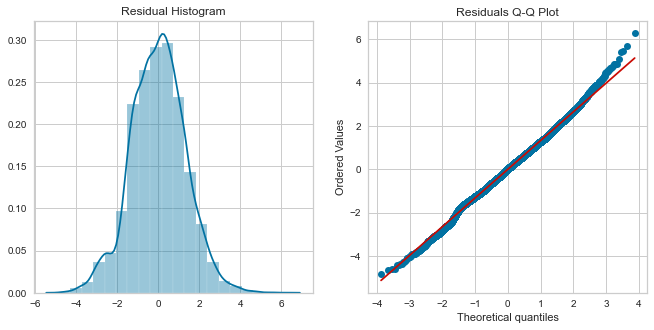

In [541]:
fig, ax = plt.subplots(figsize=(11, 5))

# Plot Histogram and Q-Q plot of normalized residuals
plt.subplot(121)
resids = y - model02.predict(X04)
sns.distplot(resids,bins=20)
plt.title("Residual Histogram");

plt.subplot(122)
stats.probplot(model_linear02.resid, dist="norm", plot= plt)
plt.title("Residuals Q-Q Plot")

#### Findings:
>1. From  the residual histogram, it looks a little bit skewed.
>2. From the QQ plot. we can see a good fit that means normality is a reasonable approximation. 

(3) Assumption of Homoscedasticity (Equal variance) and Linearity -

The assumption of homoscedasticity is a vital assumption for linear regression. If this assumption is violated, then the standard errors will be biased. The standard errors are used to conduct significance tests, and calculate the confidence intervals

The Bruesch-Pagan test will be used to check the homoscedasticity. Small p-value shows that there is violation of homoscedasticity. 

Linearity will be tested by plotting residuals vs. predictions, where residuals are prediction errors.


In [492]:
# Bruesch-Pagan test
from statsmodels.compat import lzip

name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']

test = sms.het_breuschpagan(model_linear02.resid, model_linear02.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 2009.2157005389781),
 ('p-value', 0.0),
 ('f-value', 148.770812051482),
 ('f p-value', 0.0)]

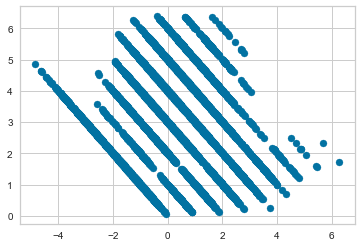

In [540]:
# plot residuals vs. predictions
fig, ax = plt.subplots(figsize=(6,4))
_ = ax.scatter(resids, model02.predict(X04))

#### Findings:
>1. We see that both linearity and homoscedasticity are not met.
>2. The test is significant (p<.05) meaning the data violates the assumption of homoscedasticity, i.e. heteroscedasticity is present in the data. The problem associated with heteroscedasticity is the fact that the standard errors are biased.
>3. If we want to use the linear regression model 02, possible data transformation such as log, Box-Cox power transformation, and other fixes may be needed to get a better regression outcome. Therefore, we'll give up Linear-model-02 (model06) in this study.

### Model Selection Summary:

The **Negative Binomial-model-02 (model04)** is our final model. Negative binomial regression is for modeling count variables, usually for over-dispersed count outcome variables. 

For this dataset, the variance is greater than the mean, which is over-dispersion. We need to use a regression model that will not make the equi-dispersion assumption i.e.not assume that variance=mean. The Negative Binomial (NB) regression model is one such model that does not make the variance = mean assumption that the Poisson regression model does.


**Dependent variable:** TARGET

**Independent variable:** 'FixedAcidity', 'VolatileAcidity', 'TotalSulfurDioxide', 'Alcohol', 'LabelAppeal_like', 'LabelAppeal_neutral', 'LabelAppeal_strongly_dislike', 'LabelAppeal_strongly_like','AcidIndex_new_AI_medium', 'STARS_Fair', 'STARS_Good', 'STARS_Poor','STARS_Very_Poor'. 

**Model**: model_nb04

**Prediction**: y_pred = model_nb04.predict(X)

***

# check performance by cross validation


In [56]:
from sklearn.model_selection import cross_val_score
# Set "K" = 10, a value that has been found through experimentation to generally result in a model with low bias and modest variance
scores = cross_val_score(model_poisson01, X, y_pred_poisson01, cv=10)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores)

TypeError: estimator should be an estimator implementing 'fit' method, <statsmodels.genmod.generalized_linear_model.GLMResultsWrapper object at 0x000001F3B34592E8> was passed